In [6]:
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn import linear_model as lm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
import xgboost as xgb

warnings.filterwarnings('ignore')

In [13]:
with open('project_data.pickle', 'rb') as f:
    df=pickle.load(f)

In [14]:
sns.set(rc = {'axes.titlesize' : 24,
              'axes.labelsize' : 20,
              'xtick.labelsize': 12,
              'ytick.labelsize': 12,
              'figure.figsize' : (8, 4.5)})

In [15]:
df = pd.get_dummies(df)

In [16]:
df.head()

,id,cnt_children,amt_income_total,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,cnt_fam_members,...,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
0,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
1,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,0,0,1,0,0,0
2,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,0,0,1,0,0,0
3,5008810,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,0,0,1,0,0,0
4,5008811,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
df.shape

(25134, 57)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 57 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   id                                                 25134 non-null  int64  
 1   cnt_children                                       25134 non-null  int64  
 2   amt_income_total                                   25134 non-null  float64
 3   days_birth                                         25134 non-null  int64  
 4   days_employed                                      25134 non-null  int64  
 5   flag_mobil                                         25134 non-null  int64  
 6   flag_work_phone                                    25134 non-null  int64  
 7   flag_phone                                         25134 non-null  int64  
 8   flag_email                                         25134 non-null  int64  
 9   cnt_fa

# EDA

In [19]:
with open('project_data.pickle', 'rb') as f:
    df=pickle5.load(f)

NameError: name 'pickle5' is not defined

In [ ]:
plt.hist(df['status'], bins = 2)
plt.title('Status')
plt.semilogy()
plt.xlabel('Status')

We should care more on the sensitivity than the accuracy because we are dealing with the unbalanced dataset. Even though the sensitivity is high because good client(status = 0) is nearly 99% of the dataset, the accuracy of the model can be not high as the sensitivity.  

### Feature Transformations

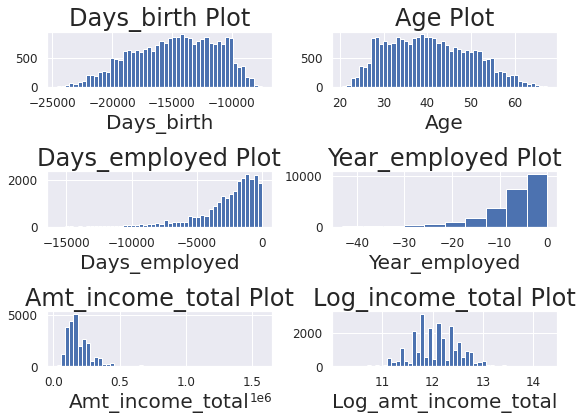

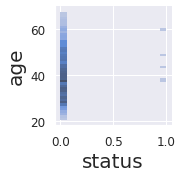

In [20]:
plt.figure(figsize = (8,6))

plt.subplot(3, 2, 1) 
plt.hist(df['days_birth'], bins = 50, label = 'days_birth' )
plt.title('Days_birth Plot')
plt.xlabel('Days_birth')

df['age'] = df['days_birth']/-365
plt.subplot(3, 2, 2) 
plt.hist(df['age'], bins = 50, label = 'Age')
plt.title('Age Plot')
plt.xlabel('Age')

plt.subplot(3, 2, 3)
plt.hist(df['days_employed'], bins = 50, label = 'days_employed')
plt.title('Days_employed Plot')
plt.xlabel('Days_employed')

df['year_employed'] = df['days_employed']/365
plt.subplot(3, 2, 4) 
plt.hist(df['year_employed'], bins = 10, label = 'Year_employed')
plt.title('Year_employed Plot')
plt.xlabel('Year_employed')


plt.subplot(3, 2, 5)
plt.hist(df['amt_income_total'], bins = 50, label = 'Amt_income_total')
plt.title('Amt_income_total Plot')
plt.xlabel('Amt_income_total')

df['log_amt_income_total'] = np.log(df.amt_income_total)
plt.subplot(3, 2, 6) 
plt.hist(df['log_amt_income_total'], bins = 50, label = 'log_amt_income_total')
plt.title('Log_income_total Plot')
plt.xlabel('Log_amt_income_total')

plt.tight_layout()

## pairplot
sns.pairplot(df, x_vars = 'status', y_vars = 'age', kind = 'hist', diag_kws={'bins': 10})

### Feature vs Label Plots

### Figure 1 

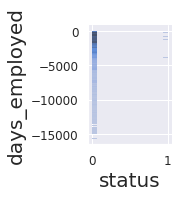

In [21]:
sns.pairplot(df, x_vars = 'status', y_vars = 'days_employed', kind = 'hist', diag_kws={'bins': 10})

The dataset is unbalanced so it was hard to see relationship between status and the days_employed.

### Figure 2

KeyError: 'code_gender'

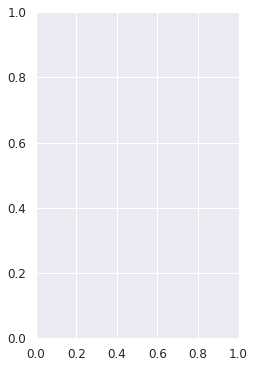

In [22]:
plt.figure(figsize = (8,6))

plt.subplot(1, 2, 1)
a = sns.barplot(x = df['status'], y = df['cnt_fam_members'], hue = df['code_gender'], )
a.axes.set_title('Status vs Cnt_fam_members Plot', fontsize = 15)
a.set_xlabel('Status', fontsize = 12)
a.set_ylabel('Cnt_fam_members',fontsize= 12)

plt.subplot(1, 2, 2)
b = sns.violinplot(x = df['status'], y = df['age'])
b.axes.set_title('Status vs Age Plot', fontsize = 15)
b.set_xlabel('Status', fontsize = 12)
b.set_ylabel('Age', fontsize = 12)


In the barplot, the male of both status of 0 and 1 has higher cnt_fam_members than the female cnt_fam_members. For the age vs status graph, maximum age of female is higher than the age of males.

# Inference

In [23]:
df = pd.get_dummies(df)
df = df.drop(['flag_own_car_N', 'days_birth', 'flag_own_realty_N', 'flag_mobil'], axis = 1)

In [24]:
df = pd.get_dummies(df)
df = df.set_index(['id'])

In [25]:
y = df['status']
x = df.drop(columns = 'status')
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state = 490, stratify = y)
x_train_std_new = x_train.apply(lambda x: (x - np.mean(x))/np.std(x), axis = 0)
x_test_std_new  = x_test.apply(lambda x: (x - np.mean(x))/np.std(x), axis = 0)
x_train_std_new = sm.add_constant(x_train_std_new)
x_test_std_new  = sm.add_constant(x_test_std_new)

In [26]:
param_grid = [
    {'alpha': 10**np.linspace(-2, 2, num = 20)}
]
cv_lasso = lm.Lasso(fit_intercept = False, normalize = False,
                    random_state = 490)
grid_search = GridSearchCV(cv_lasso, param_grid, cv = 5,
                           scoring = 'accuracy')
grid_search.fit(x_train_std_new, y_train)
print(grid_search.best_params_)
best = grid_search.best_params_['alpha']
best

{'alpha': 0.01}


0.01

In [67]:
param_grid = [
    {'alpha': 10**(-1) } 
     ]

cv_lasso = lm.Lasso(fit_intercept = False, normalize = False,
                    random_state = 490)
grid_search = GridSearchCV(cv_lasso, param_grid, cv = 5,
                           scoring = 'accuracy')
grid_search.fit(x_train_std_new, y_train)
print(grid_search.best_params_)
best = grid_search.best_params_['alpha']
best

ValueError: Parameter grid for parameter (alpha) needs to be a list or numpy array, but got (<class 'float'>). Single values need to be wrapped in a list with one element.

In [27]:
fit_lasso_tuned = sm.Logit(y_train, x_train_std_new).fit_regularized(alpha = best, L1_wt = 1)
fit_lasso_tuned.summary2()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.00015869159883026706
            Iterations: 706
            Function evaluations: 707
            Gradient evaluations: 706


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                     Results: Logit
=========================================================================================================================
Model:                                  Logit                               Pseudo R-squared:                    0.985   
Dependent Variable:                     status                              AIC:                                 110.2860
Date:                                   2021-08-24 11:22                    BIC:                                 469.0169
No. Observations:                       5026                                Log-Likelihood:                      -0.14298
Df Model:                               54                                  LL-Null:                             -9.5223 
Df Residuals:                           4971                                LLR p-value:                         1.0000  
Converged:                              1.0000                              Scale:                               1.0000  
No. Iterations:                         706.0000                                                                         
-------------------------------------------------------------------------------------------------------------------------
                                                   Coef.      Std.Err.       z    P>|z|       [0.025           0.975]    
-------------------------------------------------------------------------------------------------------------------------
const                                             -28.3118      1711.9699 -0.0165 0.9868       -3383.7112       3327.0876
cnt_children                                       -2.0892      2786.8554 -0.0007 0.9994       -5464.2254       5460.0470
amt_income_total                                    0.0000        26.5197  0.0000 1.0000         -51.9777         51.9777
days_employed                                       2.2312 599804349.5821  0.0000 1.0000 -1175594920.7201 1175594925.1825
flag_work_phone                                    -1.2749         9.5235 -0.1339 0.8935         -19.9405         17.3908
flag_phone                                         -1.1429         8.7444 -0.1307 0.8960         -18.2816         15.9959
flag_email                                         -0.6315         8.5489 -0.0739 0.9411         -17.3870         16.1240
cnt_fam_members                                    -0.4482      3385.5461 -0.0001 0.9999       -6635.9967       6635.1003
months_balance                                     -2.6998         4.8149 -0.5607 0.5750         -12.1369          6.7373
code_gender_F                                       1.1656            nan     nan    nan              nan             nan
code_gender_M                                      -1.1656            nan     nan    nan              nan             nan
flag_own_car_Y                                     -4.6204         8.1198 -0.5690 0.5693         -20.5348         11.2941
flag_own_realty_Y                                   1.6467         9.5749  0.1720 0.8635         -17.1198         20.4132
name_income_type_Commercial associate              -0.4962            nan     nan    nan              nan             nan
name_income_type_Pensioner                         -0.0000            nan     nan    nan              nan             nan
name_income_type_State servant                     -0.0394            nan     nan    nan              nan             nan
name_income_type_Student                           -0.0000            nan     nan    nan              nan             nan
name_income_type_Working                            0.8357            nan     nan    nan              nan             nan
name_education_type_Academic degree                -0.0000   5064219.5385 -0.0000 1.0000    -9925687.9052    9925687.9052
name_education_type_Higher education                2.2454  72448049.9111  0.0000 1.0000  -141995566.

In [28]:
# drop coefficients that are 0
x_train_std_new = x_train_std_new.drop(['name_income_type_Pensioner', 'name_income_type_State servant', 'name_income_type_Student', 
                  'name_education_type_Academic degree', 'name_education_type_Lower secondary', 'name_family_status_Widow',
                  'name_housing_type_House / apartment', 'name_housing_type_Office apartment', 'name_housing_type_With parents',
                  'occupation_type_Cleaning staff', 'occupation_type_Cooking staff', 'occupation_type_Core staff', 
                  'occupation_type_Drivers', 'occupation_type_HR staff', 'occupation_type_High skill tech staff',
                  'occupation_type_IT staff', 'occupation_type_Low-skill Laborers', 'occupation_type_Managers',
                  'occupation_type_Accountants', 'occupation_type_Private service staff', 'occupation_type_Realty agents', 
                  'occupation_type_Realty agents','occupation_type_Sales staff', 'occupation_type_Secretaries', 
                  'occupation_type_Waiters/barmen staff', 'name_education_type_Incomplete higher', 'occupation_type_Medicine staff',
                  'occupation_type_Security staff'
                 ], axis = 1)

In [29]:
fit_lasso_tuned = sm.Logit(y_train, x_train_std_new).fit_regularized(alpha = best, L1_wt = 1)
fit_lasso_tuned.summary2()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.00015938674433749233
            Iterations: 305
            Function evaluations: 306
            Gradient evaluations: 305


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                             Results: Logit
========================================================================================================
Model:                             Logit                         Pseudo R-squared:              0.985   
Dependent Variable:                status                        AIC:                           56.2951 
Date:                              2021-08-24 11:22              BIC:                           238.9218
No. Observations:                  5026                          Log-Likelihood:                -0.14757
Df Model:                          27                            LL-Null:                       -9.5223 
Df Residuals:                      4998                          LLR p-value:                   0.87895 
Converged:                         1.0000                        Scale:                         1.0000  
No. Iterations:                    305.0000                                                             
--------------------------------------------------------------------------------------------------------
                                                   Coef.    Std.Err.    z    P>|z|    [0.025     0.975] 
--------------------------------------------------------------------------------------------------------
const                                             -28.4887   18.7378 -1.5204 0.1284   -65.2142    8.2368
cnt_children                                       -1.9647 2771.2689 -0.0007 0.9994 -5433.5519 5429.6226
amt_income_total                                    0.1651   25.6391  0.0064 0.9949   -50.0865   50.4167
days_employed                                       2.1925       nan     nan    nan        nan       nan
flag_work_phone                                    -1.3489    9.9737 -0.1352 0.8924   -20.8970   18.1992
flag_phone                                         -1.1760    8.3245 -0.1413 0.8877   -17.4916   15.1396
flag_email                                         -0.7654    7.9812 -0.0959 0.9236   -16.4082   14.8774
cnt_fam_members                                    -0.4285 3366.6097 -0.0001 0.9999 -6598.8621 6598.0052
months_balance                                     -2.6585    4.5783 -0.5807 0.5615   -11.6318    6.3149
code_gender_F                                       1.2206       nan     nan    nan        nan       nan
code_gender_M                                      -1.2206       nan     nan    nan        nan       nan
flag_own_car_Y                                     -4.5059    8.0489 -0.5598 0.5756   -20.2814   11.2696
flag_own_realty_Y                                   1.6491    9.1691  0.1799 0.8573   -16.3219   19.6202
name_income_type_Commercial associate              -0.5558   16.3054 -0.0341 0.9728   -32.5137   31.4022
name_income_type_Working                            0.9307   12.1247  0.0768 0.9388   -22.8333   24.6948
name_education_type_Higher education                2.2141   20.2804  0.1092 0.9131   -37.5347   41.9630
name_education_type_Secondary / secondary special  -1.9098   21.9831 -0.0869 0.9308   -44.9959   41.1762
name_family_status_Civil marriage                  -0.1871 1012.0882 -0.0002 0.9999 -1983.8436 1983.4693
name_family_status_Married                          2.0542 1661.4218  0.0012 0.9990 -3254.2727 3258.3811
name_family_status_Separated                       -0.3251   38.5596 -0.0084 0.9933   -75.9005   75.2503
name_family_status_Single / not married            -1.5126   55.8318 -0.0271 0.9784  -110.9408  107.9156
name_housing_type_Co-op apartment                  -0.5746    3.6996 -0.1553 0.8766    -7.8256    6.6765
name_housing_type_Municipal apartment              -0.0612    8.4947 -0.0072 0.9943   -16.7105   16.5882
name_housing_type_Rented apartment                 -0.0769    4.6092 -0.0167 0.9867    -9.1107    8.9569
occupation_type_Laborers                            3.5077    6.2821  0.5584 0.5766    -8.8049   15.8204
age   

In [30]:
# Looking at the z-scores, name_family_status_Separated, name_housing_type_Municipal apartment, 'cnt_children' should be used

In [31]:
sm.Logit(y_train, x_train_std_new[['name_family_status_Separated', 'name_housing_type_Municipal apartment', 'cnt_children']]).fit().get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                 status
Method:                          dydx
At:                           overall
=========================================================================================================
                                           dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
name_family_status_Separated          -4.909e-05      0.007     -0.007      0.994      -0.014       0.014
name_housing_type_Municipal apartment -3.984e-05      0.007     -0.006      0.995      -0.014       0.014
cnt_children                             -0.0001      0.007     -0.019      0.985      -0.014       0.014
=========================================================================================================
"""

An increase in one's name_family_status_Separated by one standard deviation is associated with a decrease probability of having status by -4.909e-05.

An increase in one's name_housing_type_Municipal apartment by one standard deviation is associated with a decrease probability of having status by -3.984e-05.

An increase in one's cnt_children by one standard deviation is associated with a decrease probability of having status by -0.0001.

# Prediction

##### Binomial Logit

In [32]:
y = df['status']
x = df.drop(columns = 'status')
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state = 490, stratify = y)
x_train_std = x_train.apply(lambda x: (x - np.mean(x))/np.std(x), axis = 0)
x_test_std  = x_test.apply(lambda x: (x - np.mean(x))/np.std(x), axis = 0)

In [33]:
fit_lasso_tuned = sm.Logit(y_train, x_train).fit_regularized(alpha = best, L1_wt = 1)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0001498598702146538
            Iterations: 637
            Function evaluations: 656
            Gradient evaluations: 637


In [34]:
yhat = fit_lasso_tuned.predict(x_test)

In [35]:
# Lasso Accuracy

In [36]:
la = np.mean(round(yhat, 2) == y_test)
la

0.9966679928386711

##### XGBoost

In [37]:
xg = xgb.XGBClassifier(n_estimators = 250,
                       max_depth = 2, 
                       learning = 0.5,
                       use_label_encoder = False,
                       random_state = 490)

xg.fit(x_train_std, y_train,
       eval_set = [(x_test, y_test)],
       early_stopping_rounds = 5
       )

[11:22:19] WARNING: ../src/learner.cc:573: 
Parameters: { "learning" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:22:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.43792
[1]	validation_0-logloss:0.29692
[2]	validation_0-logloss:0.20810
[3]	validation_0-logloss:0.14869
[4]	validation_0-logloss:0.10760
[5]	validation_0-logloss:0.07859
[6]	validation_0-logloss:0.05783
[7]	validation_0-logloss:0.04283
[8]	validation_0-logloss:0.03194
[9]	validation_0-logloss:0.02399
[10]	validation_0-logloss:0.01818
[11]	validation_0-logloss:0.01392
[12]	validation_0-lo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='', learning=0.5,
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=128, num_parallel_tree=1,
              random_state=490, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [38]:
# Choosing the best iteration refit the model

In [39]:
best_iteration = xg.get_booster().best_iteration
best_iteration

35

In [40]:
xg = xgb.XGBClassifier(n_estimators = 30,
                       max_depth = 2, 
                       learning = 0.5,
                       use_label_encoder = False,
                       random_state = 490)

xg.fit(x_train_std, y_train,
       eval_set = [(x_test, y_test)],
       )

[11:22:19] WARNING: ../src/learner.cc:573: 
Parameters: { "learning" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:22:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.43792
[1]	validation_0-logloss:0.29692
[2]	validation_0-logloss:0.20810
[3]	validation_0-logloss:0.14869
[4]	validation_0-logloss:0.10760
[5]	validation_0-logloss:0.07859
[6]	validation_0-logloss:0.05783
[7]	validation_0-logloss:0.04283
[8]	validation_0-logloss:0.03194
[9]	validation_0-logloss:0.02399
[10]	validation_0-logloss:0.01818
[11]	validation_0-logloss:0.01392
[12]	validation_0-lo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='', learning=0.5,
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=128, num_parallel_tree=1,
              random_state=490, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [41]:
# XGBoost accuracy

In [42]:
xg_acc = xg.score(x_test_std, y_test)
xg_acc

0.9997016112989855

In [43]:
# XGBoost Confusion Matrix

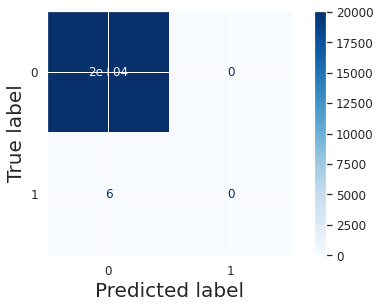

In [44]:
plot_confusion_matrix(xg, x_test_std, y_test, cmap=plt.cm.Blues)
plt.show()

##### AdaBoost

In [45]:
# Tuning the AdaBoost

In [46]:
param_grid = {
    'n_estimators': [25, 50, 75, 100, 125,],
    'learning_rate': [0.1, 0.5, 1, 1.25, 1.5]
}

ad_cv = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1),
                           random_state = 490)
grid_search = GridSearchCV(ad_cv, param_grid,
                           cv = 5,
                           scoring = 'r2').fit(x_train, y_train)
best = grid_search.best_params_
best

{'learning_rate': 0.1, 'n_estimators': 25}

In [37]:
# Using learning rate and n_estimators above to find better accuracy

In [38]:
ad = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1),
                        n_estimators = 25,
                        learning_rate = 0.1,
                        random_state = 490)
ad.fit(x_train_std, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=25, random_state=490)

In [39]:
# AdaBoost accuracy

In [40]:
ad_acc = ad.score(x_test_std, y_test)
ad_acc

0.9997016112989855

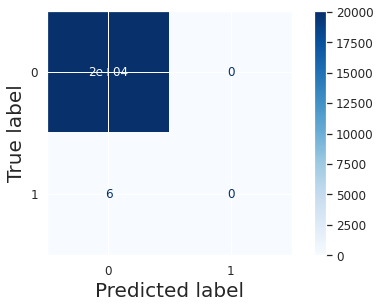

In [41]:
plot_confusion_matrix(ad, x_test_std, y_test, cmap=plt.cm.Blues)
plt.show()

In [42]:
df = [['Lasso', round(la, 5)], ['XGBoost', round(xg_acc, 5)], ['AdaBoost', round(ad_acc, 5)]]

In [43]:
df = pd.DataFrame(df, columns = ['Model', 'Accuracy'])
df

,Model,Accuracy
0,Lasso,0.99667
1,XGBoost,0.99970
2,AdaBoost,0.99970


Comparisons of models: Since the data is highly unbalanced, the accuracy rates came out to be high. XGBoost and AdaBoost models had slightly higher accuracy rates compared to the Lasso model. XGBoost and AdaBoost models had exactly the same accuracy rate. One can figure this out by looking at the confusion matrix. The best models are both XGBoost and AdaBoost models.

The models are inflexible and hard to interpret because the dataset is unbalanced. For instance, there were 25127 good clients but only 7 bad clients. XGBoost model and AdaBoost model had very high accuracy and sensitivity, there should be more bad clients data to have better interpretation